In [1]:
# import packages
from google.colab import drive

import seaborn as sns
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

plt.style.use('ggplot')

#Data Explore
src = 'adyen_data.csv'
# drive.mount('/content/drive')

# src = '/content/drive/My Drive/CS4034_data/data_for_student_case_cleaned.csv'
df = pd.read_csv(src)
df.head

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


<bound method DataFrame.head of         Unnamed: 0    txid          bookingdate issuercountrycode  \
0                0       1  2015-11-09 14:26:51                MX   
1                1       2  2015-11-09 14:27:38                MX   
2                2       3  2015-11-23 16:34:16                MX   
3                3       4  2015-11-23 16:34:51                MX   
4                4       5  2015-11-09 14:26:08                MX   
5                5       6  2015-11-09 14:26:25                MX   
6                6       7  2015-11-09 14:26:47                MX   
7                7       8  2015-11-23 16:34:29                MX   
8                8       9  2015-12-08 19:58:35                MX   
9                9      10  2015-11-09 14:25:50                MX   
10              10      11  2015-11-23 16:34:29                MX   
11              11      12  2015-11-09 14:26:11                MX   
12              12      13  2015-12-08 19:58:35                MX   
13

In [2]:
df['label'].value_counts()

False    236691
True        345
Name: label, dtype: int64

In [0]:
def CreateHeatmap(label,variable1,variable2, title):

    # modify data to correct format
    SplittedDataSet = df[df['simple_journal'] == label]
    DisplayData = SplittedDataSet.groupby([variable1, variable2]).size()\
        .reset_index(name='count')

    # Filter the country codes
    var2disp = list(df[variable2][df.simple_journal == 'Chargeback'].unique())
    var1disp = list(df[variable1][df.simple_journal == 'Chargeback'].unique())
    DisplayData = DisplayData[DisplayData[variable2].isin(var2disp)]
    DisplayData = DisplayData[DisplayData[variable1].isin(var1disp)]

    # create pivot and plot
    PivotData = DisplayData.pivot(index=variable1, columns=variable2, values='count')
    sns.heatmap(PivotData, cmap='coolwarm', linewidths=.5)
    plt.xlabel(variable2)
    plt.ylabel(variable1)
    plt.title(title)

In [4]:
df.groupby('label').mean()

,Unnamed: 0,txid,bin,amount,cvcresponsecode,creation_month,creation_weekday,converted_amount
label,,,,,,,,
False,142224.916731,282356.836572,485026.022493,18888.996037,0.816284,8.464745,2.967253,1953.808810
True,39342.475362,73571.394203,498004.162319,105137.652174,0.121739,8.669565,2.715942,17006.692754


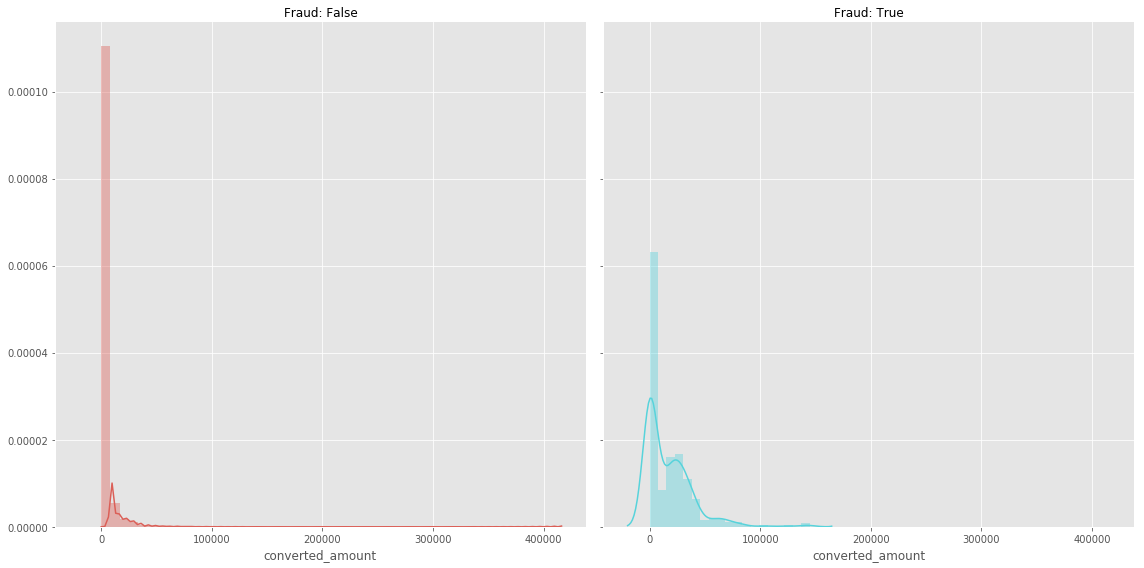

In [5]:
import seaborn as sns
g = sns.FacetGrid(df, col="label", height=8,hue='label',palette='hls')
g.map(sns.distplot,"converted_amount",kde=True)
g.set_titles('Fraud: {col_name}')

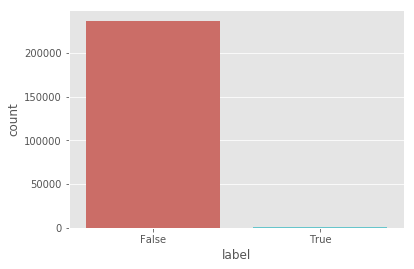

In [6]:
sns.countplot(data=df,x='label', palette='hls')

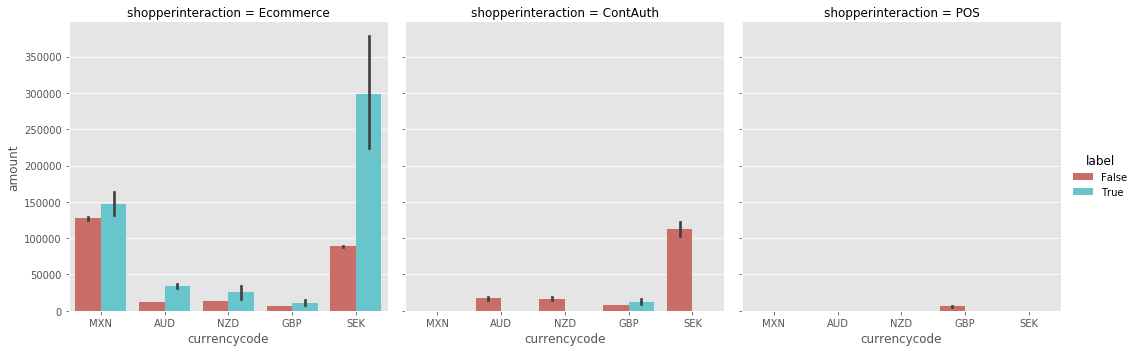

In [8]:
sns.catplot(data=df,x="currencycode", y="amount", hue="label",kind='bar',col='shopperinteraction', palette='hls')

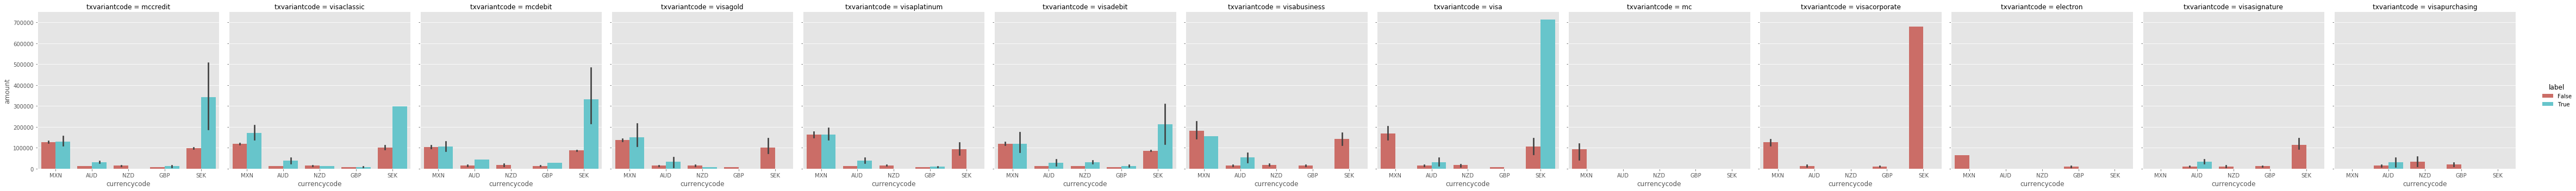

In [8]:
sns.catplot(data=df,x="currencycode", y="amount", hue="label",kind='bar',col='txvariantcode', palette='hls')

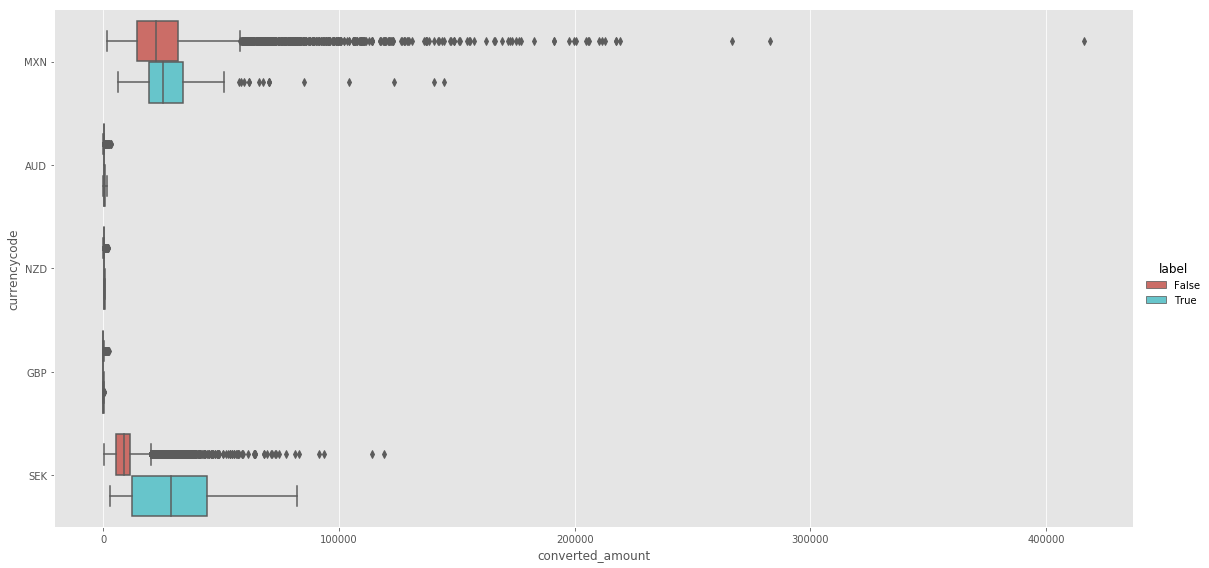

In [9]:
sns.catplot(data=df,x="converted_amount", y="currencycode", hue="label",kind='box',height=8, aspect=2, palette='hls')

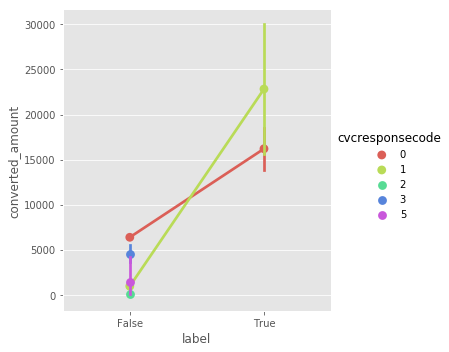

In [10]:
sns.catplot(data=df,x="label", y="converted_amount",hue="cvcresponsecode", kind='point', palette='hls')

In [11]:
sns.catplot(data=df,x="currencycode", y="amount", hue="label",kind='bar',col='shoppercountrycode', palette='hls')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fdb06518c08> (for post_execute):


KeyboardInterrupt: ignored

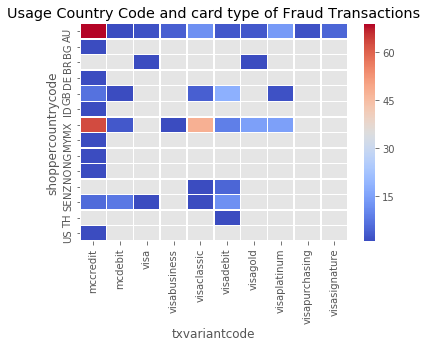

In [12]:
CreateHeatmap('Chargeback','shoppercountrycode','txvariantcode', 'Usage Country Code and card type of Fraud Transactions')

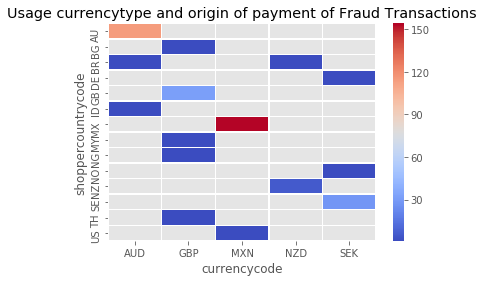

In [13]:
CreateHeatmap('Chargeback', 'shoppercountrycode','currencycode','Usage Currencytype and Origin of Payment of Fraud Transactions')

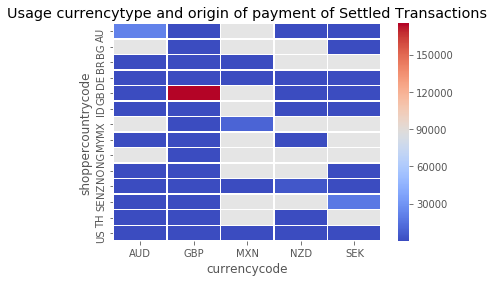

In [14]:
CreateHeatmap('Settled', 'shoppercountrycode','currencycode','Usage currencytype and origin of payment of Settled Transactions')

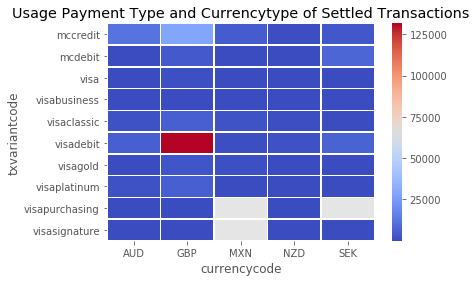

In [5]:
CreateHeatmap('Settled', 'txvariantcode','currencycode','Usage Payment Type and Currencytype of Settled Transactions')

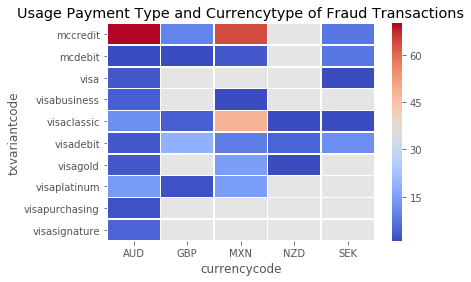

In [6]:
CreateHeatmap('Chargeback', 'txvariantcode','currencycode','Usage Payment Type and Currencytype of Fraud Transactions')

attributes to visualize:


1. amount histogram fraudulent transactions and non fraudulent transactions

2. where fraudulent transactions are most prevailant:  shopperinteraction

2. difference in fraudulent and non transactions per country code

2. difference in fraudulent and non transactions per currency code

2. cvc response code vs amount of money for fraud and non fraud

2. difference visa and mastercard for fraud and non fraud transactions
